In [ ]:
pip install split-folders[full]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import splitfolders

In [ ]:
input_folder = "COVID19dataset"

In [ ]:
splitfolders.ratio(input_folder, output="Covid19dataset2",
                   seed=42, ratio=(.8, .2),
                   group_prefix=None)

Copying files: 13808 files [02:24, 95.79 files/s] 


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
cd VITproj

/content/drive/MyDrive/VITproj


In [ ]:
ls

Covid19dataset2.zip


In [ ]:
!unzip Covid19dataset2.zip

Streaming output truncated to the last 5000 lines.
  inflating: Covid19dataset2/train/Normal/Normal-433.png  
  inflating: Covid19dataset2/train/Normal/Normal-4330.png  
  inflating: Covid19dataset2/train/Normal/Normal-4332.png  
  inflating: Covid19dataset2/train/Normal/Normal-4335.png  
  inflating: Covid19dataset2/train/Normal/Normal-4336.png  
  inflating: Covid19dataset2/train/Normal/Normal-4337.png  
  inflating: Covid19dataset2/train/Normal/Normal-4338.png  
  inflating: Covid19dataset2/train/Normal/Normal-4339.png  
  inflating: Covid19dataset2/train/Normal/Normal-434.png  
  inflating: Covid19dataset2/train/Normal/Normal-4341.png  
  inflating: Covid19dataset2/train/Normal/Normal-4343.png  
  inflating: Covid19dataset2/train/Normal/Normal-4347.png  
  inflating: Covid19dataset2/train/Normal/Normal-4348.png  
  inflating: Covid19dataset2/train/Normal/Normal-4349.png  
  inflating: Covid19dataset2/train/Normal/Normal-435.png  
  inflating: Covid19dataset2/train/Normal/Normal-435

**Data Preprocessing**

In [ ]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)

In [ ]:

train = train_gen.flow_from_directory('VITproj/Covid19dataset2/train',
                                      target_size=(299, 299),
                                      class_mode='categorical',
                                      batch_size=32)
test = test_gen.flow_from_directory('VITproj/Covid19dataset2/test',
                                    target_size=(299, 299),
                                      class_mode='categorical',
                                      batch_size=32)

Found 11045 images belonging to 2 classes.
Found 2763 images belonging to 2 classes.


In [ ]:
train.class_indices

{'COVID': 0, 'Normal': 1}

In [ ]:
# CNN

from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
import keras
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image

**CNN Model Building and tuning (Adding feature extraction layers)**

In [ ]:
Xcept = Xception(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=2,
    classifier_activation="softmax",
)
model=models.Sequential()
model.add(Xcept)
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(299, 299, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(62,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='softmax'))

In [ ]:

model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
es =tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 2, patience = 4)

trainer=model.fit(train,batch_size=32,validation_data=test,epochs=30, callbacks = [es])

Epoch 1/30
346/346 [==============================] - 417s 1s/step - loss: 0.3386 - accuracy: 0.8538 - val_loss: 1.1813 - val_accuracy: 0.2620
Epoch 2/30
346/346 [==============================] - 369s 1s/step - loss: 0.1736 - accuracy: 0.9345 - val_loss: 5.6338 - val_accuracy: 0.4455
Epoch 3/30
346/346 [==============================] - 369s 1s/step - loss: 0.1311 - accuracy: 0.9503 - val_loss: 9.6210 - val_accuracy: 0.4499
Epoch 4/30
346/346 [==============================] - 369s 1s/step - loss: 0.1189 - accuracy: 0.9563 - val_loss: 3.5104 - val_accuracy: 0.6164
Epoch 5/30
346/346 [==============================] - 365s 1s/step - loss: 0.1043 - accuracy: 0.9620 - val_loss: 0.6531 - val_accuracy: 0.7633
Epoch 6/30
346/346 [==============================] - 366s 1s/step - loss: 0.0755 - accuracy: 0.9737 - val_loss: 0.3981 - val_accuracy: 0.8983
Epoch 7/30
346/346 [==============================] - 364s 1s/step - loss: 0.0729 - accuracy: 0.9740 - val_loss: 0.2649 - val_accuracy: 0.9251

In [ ]:
model.save('covid19detect.h5')

**Testing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

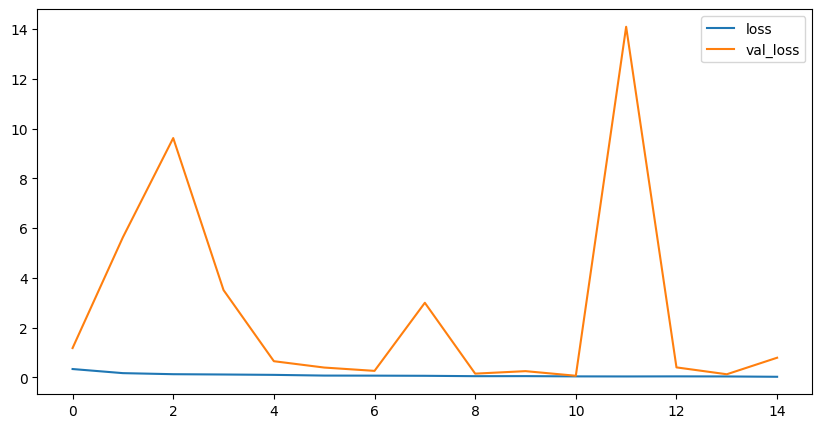

In [ ]:
# Plotting train_loss vs val_loss
plt.figure(figsize=(10,5))
plt.plot(trainer.history["loss"],label="loss")
plt.plot(trainer.history["val_loss"],label="val_loss")
plt.legend()

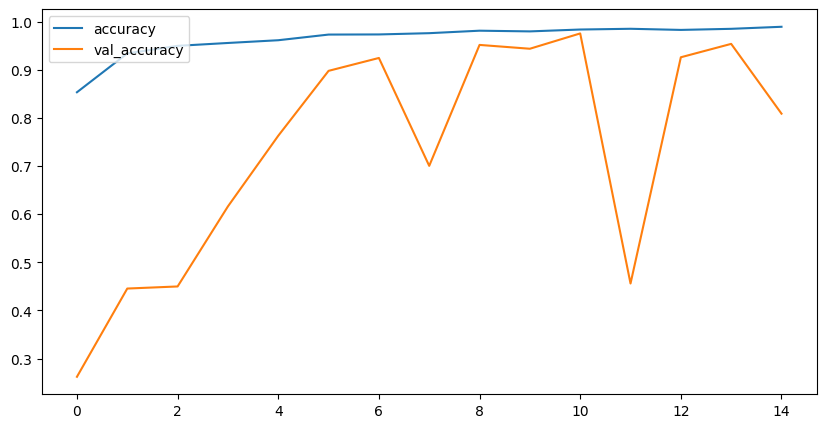

In [ ]:
# Plotting train_accuracy vs Val_accuracy
plt.figure(figsize=(10,5))
plt.plot(trainer.history["accuracy"],label="accuracy")
plt.plot(trainer.history["val_accuracy"],label="val_accuracy")
plt.legend(loc='upper left')

In [ ]:
test

In [ ]:
probabilities = model.predict(test)

87/87 [==============================] - 22s 250ms/step


In [ ]:
probabilities

array([[9.9335194e-01, 6.6479919e-03],
       [5.7050489e-05, 9.9994290e-01],
       [4.8347679e-04, 9.9951649e-01],
       ...,
       [1.9914734e-01, 8.0085266e-01],
       [6.6008070e-05, 9.9993396e-01],
       [5.3524767e-04, 9.9946481e-01]], dtype=float32)

In [ ]:
y_true = test.classes

In [ ]:
y_pred = probabilities > 0.5

In [ ]:
y_pred

array([[ True, False],
       [False,  True],
       [False,  True],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
test

In [ ]:
probabilities = model.predict(test)

87/87 [==============================] - 21s 233ms/step


In [ ]:
probabilities

array([[1.5988728e-02, 9.8401135e-01],
       [7.2150811e-04, 9.9927849e-01],
       [1.4478754e-03, 9.9855214e-01],
       ...,
       [4.5360019e-04, 9.9954635e-01],
       [9.9501193e-01, 4.9880552e-03],
       [9.8747754e-01, 1.2522502e-02]], dtype=float32)

In [ ]:
y_true = test.classes

In [ ]:
y_pred = probabilities > 0.5

In [ ]:
y_pred

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [False,  True],
       [ True, False],
       [ True, False]])

In [ ]:
model=load_model("covid19detect2.h5")

In [ ]:
filepath="VITproj/Covid19dataset2/test/Normal/Normal-9946.png"
img=image.load_img(filepath,target_size=(299,299))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)
index=['COVID','Normal']
text="The Classified Animal is : " +str(index[pred[0]])
print(model.predict(x))

1/1 [==============================] - 0s 96ms/step
[[1. 0.]]


In [ ]:

filepath="VITproj/Covid19dataset2/test/COVID/COVID-3566.png"
img=image.load_img(filepath,target_size=(299,299))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)
index=['COVID','Normal']
text="The Lung X-ray shows: " +str(index[pred[0]])
print(text)
print(model.predict(x))

1/1 [==============================] - 0s 24ms/step
The Lung X-ray shows: COVID
1/1 [==============================] - 0s 23ms/step
[[1. 0.]]
